In [ ]:
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt
import netCDF4 as nc
from mpl_toolkits.basemap import Basemap
import csv

In [11]:
def replace_missing_data(array):
    array_new = array.copy()
    for row in range(len(array)):
        for col in range(len(array[row])):
            if array[row, col] == 99999.0:
                array_new[row, col] = np.nan
    return array_new

In [4]:
with open("Aqua_MODIS_monthly_2020/MODAL2_M_AER_OD_2020-09-01_rgb_3600x1800.CSV", 'r') as f:
    file = list(csv.reader(f, delimiter=","))
data_sep = np.array(file, dtype=np.float)

In [5]:
with open("Aqua_MODIS_monthly_2020/MYDAL2_M_AER_OD_2020-08-01_rgb_3600x1800.CSV", 'r') as f:
    file = list(csv.reader(f, delimiter=","))
data_aug = np.array(file, dtype=np.float)

In [7]:
with open("Aqua_MODIS_monthly_2020/MYDAL2_M_AER_OD_2020-07-01_rgb_3600x1800.CSV", 'r') as f:
    file = list(csv.reader(f, delimiter=","))
data_jul = np.array(file, dtype=np.float)

In [8]:
with open("Aqua_MODIS_monthly_2020/MYDAL2_M_AER_OD_2020-06-01_rgb_3600x1800.CSV", 'r') as f:
    file = list(csv.reader(f, delimiter=","))
data_jun = np.array(file, dtype=np.float)

In [12]:
data_sep_ = replace_missing_data(data_sep)
data_aug_ = replace_missing_data(data_aug)
data_jul_ = replace_missing_data(data_jul)
data_jun_ = replace_missing_data(data_jun)

In [20]:
data_list = [data_jun_, data_jul_, data_aug_, data_sep_]

### Testing one month of data

In [13]:
lons = np.arange(-180, 180, 0.1)
lats = np.arange(-90, 90, 0.1)
lats = lats[::-1]

lon, lat = np.meshgrid(lons, lats)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  from ipykernel import kernelapp as app


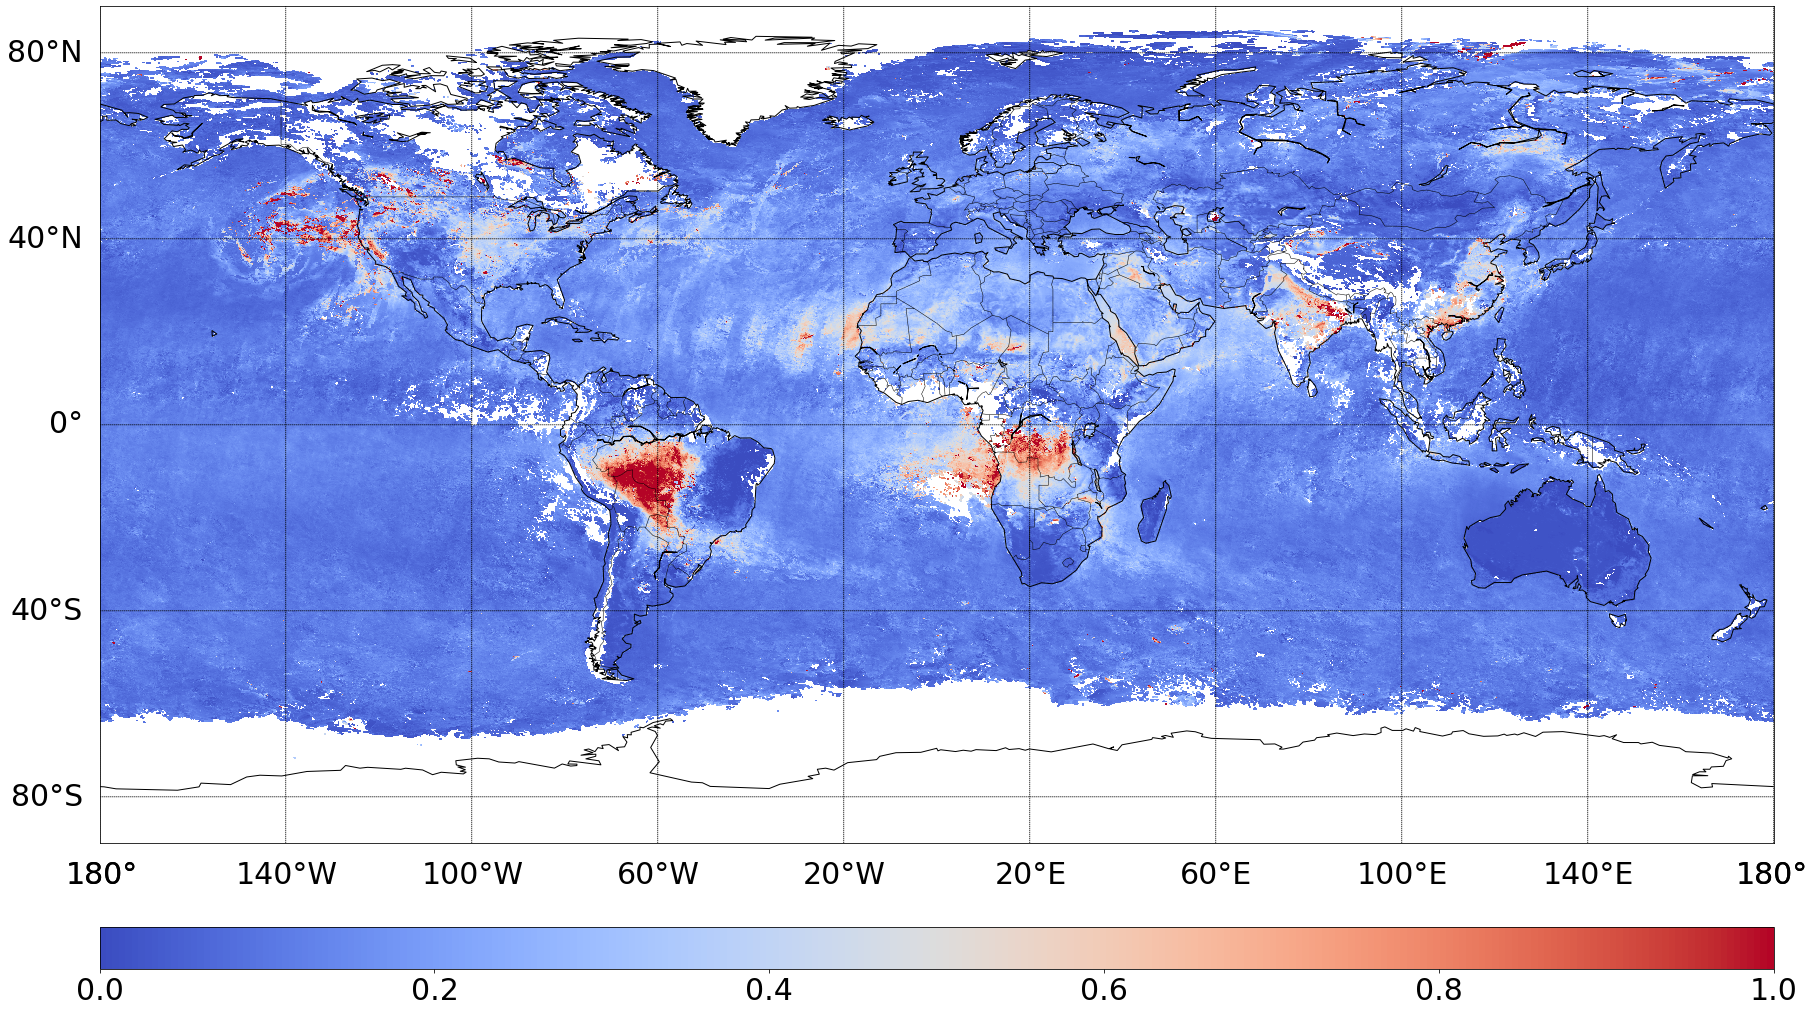

In [15]:
plt.figure(figsize = (30, 150))

m = Basemap()
xi, yi = m(lon, lat)
my_cmap = plt.get_cmap('coolwarm')

cs = m.pcolormesh(xi, yi, data_sep_, cmap = my_cmap)

# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 40.), labels=[1,0,0,0], fontsize=30);
m.drawmeridians(np.arange(-180., 181., 40.), labels=[0,0,0,1], fontsize=30);

# Adding coast and country lines
m.drawcoastlines()
m.drawcountries()

cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.ax.tick_params(labelsize=30)
#cbar.set_label('count', fontsize=20)

plt.show()

### Zoom in on the UK

#### UK Latitudes, Longitudes

In [16]:
lon_0 = -11
lon_1 = 2
lat_0 = 50
lat_1 = 59

#### Define Coordinates with respect to these images

In [17]:
x0 = 1800 + lon_0*10
x1 = 1800 + lon_1*10
y0 = 900 - lat_1*10
y1 = 900 - lat_0*10

In [18]:
lons_uk = np.arange(lon_0, lon_1, 0.1)
lats_uk = np.arange(lat_0, lat_1, 0.1)
lats_uk = lats_uk[::-1]

lon_uk, lat_uk = np.meshgrid(lons_uk, lats_uk)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  from ipykernel import kernelapp as app


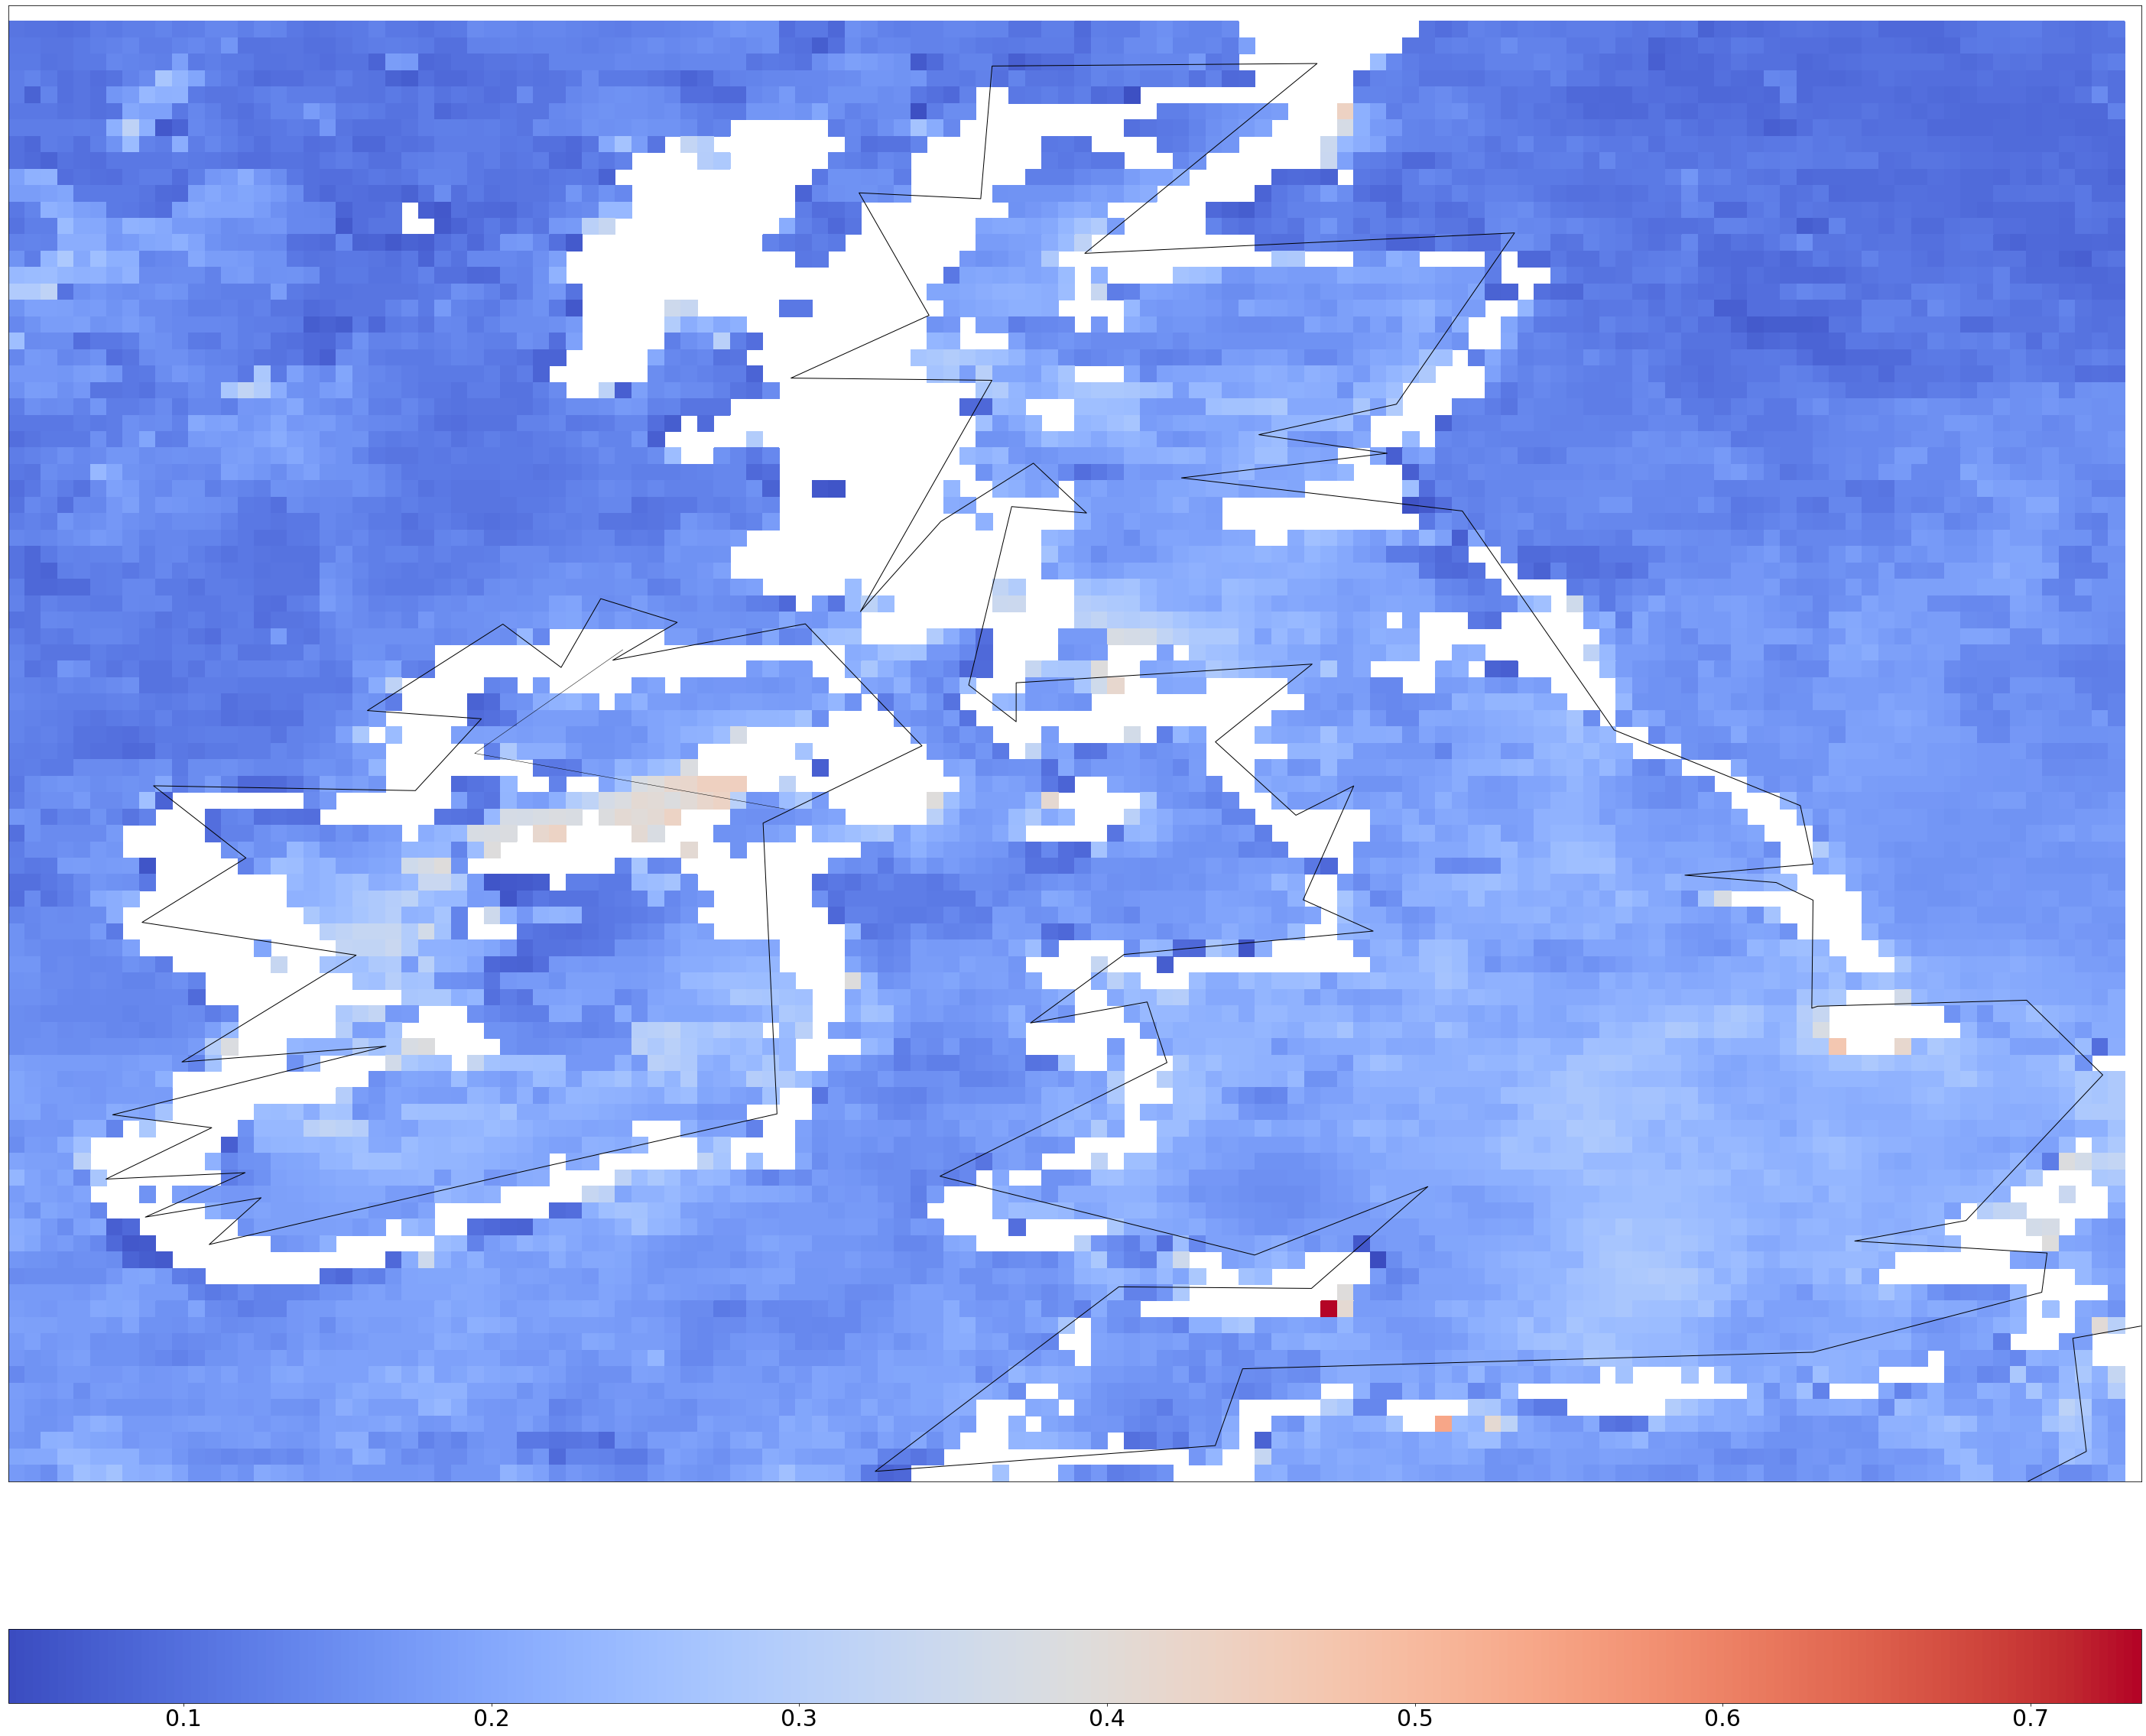

In [19]:
plt.figure(figsize = (50, 250))

m = Basemap(llcrnrlat=lat_0, urcrnrlat=lat_1, llcrnrlon=lon_0, urcrnrlon=lon_1)
xi, yi = m(lon_uk, lat_uk)

my_cmap = plt.get_cmap('coolwarm')

cs = m.pcolor(xi, yi, data_sep_[y0:y1,x0:x1], cmap = my_cmap)

# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 40.), labels=[1,0,0,0], fontsize=30);
m.drawmeridians(np.arange(-180., 181., 40.), labels=[0,0,0,1], fontsize=30);

m.drawcoastlines()
m.drawcountries()

cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.ax.tick_params(labelsize=30)
#cbar.set_label('count', fontsize=20)

plt.show()

### Cumulative AOD

#### Sum over all values across the UK

In [65]:
np.nansum(data_new[y0:y1,x0:x1])/np.count_nonzero(~np.isnan(data_new[y0:y1,x0:x1]))

0.17077965756216879

In [66]:
np.nansum(data_new[y0:y1,x0:x1])

1675.69

#### Monthly trend

In [30]:
months = [6, 7, 8, 9]
AOD = []

In [31]:
for data_month in data_list:
    AOD_sum = np.nansum(data_month[y0:y1,x0:x1])/np.count_nonzero(~np.isnan(data_month[y0:y1,x0:x1]))
    AOD.append(AOD_sum)

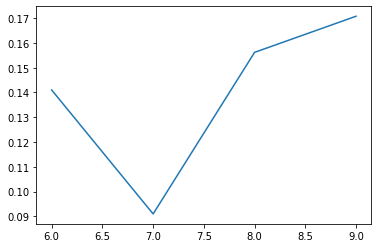

In [32]:
plt.plot(months, AOD)